In [179]:
import pandas as pd
from matplotlib.pyplot import matplotlib as plt
import seaborn as sns
import numpy as np

In [170]:
df= pd.read_csv('url.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

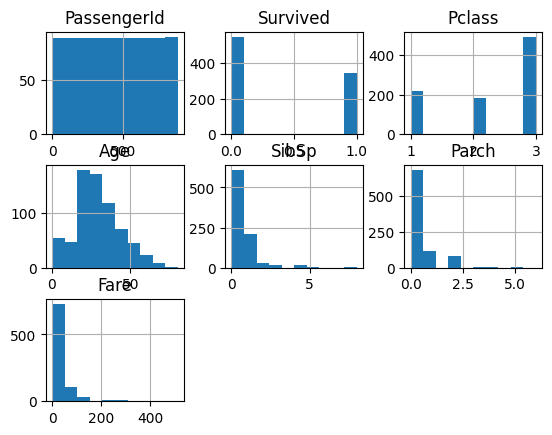

In [171]:
df.hist()

<Axes: ylabel='Age'>

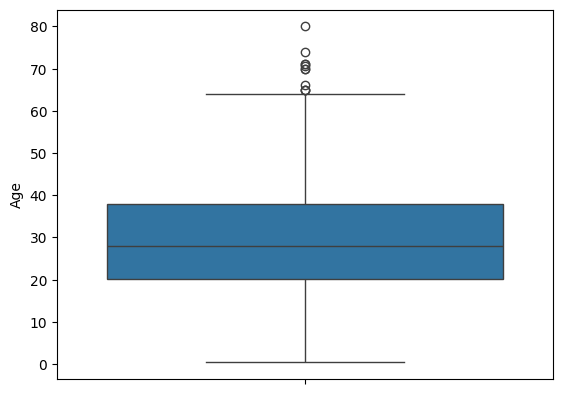

In [172]:
sns.boxplot(df['Age'])

In [173]:
percentile_25 = df['Age'].quantile(0.25)
percentile_75 = df['Age'].quantile(0.75)
print(percentile_25)
print(percentile_75)

20.125
38.0


In [174]:
iqr = percentile_75 - percentile_25
iqr

17.875

In [175]:
upperLimit = percentile_75 + 1.5 * iqr
lowerLimit = percentile_25 - 1.5 * iqr
print(upperLimit)
print(lowerLimit)

64.8125
-6.6875


In [176]:
new_df = df[df['Age'] < upperLimit]
new_df = df[df['Age'] < lowerLimit]



In [177]:
new_df_cap = df.copy()
new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upperLimit,
    upperLimit,
    np.where(
        new_df_cap['Age'] < lowerLimit,
        lowerLimit,
        new_df_cap['Age']
    )
)

<Axes: ylabel='Age'>

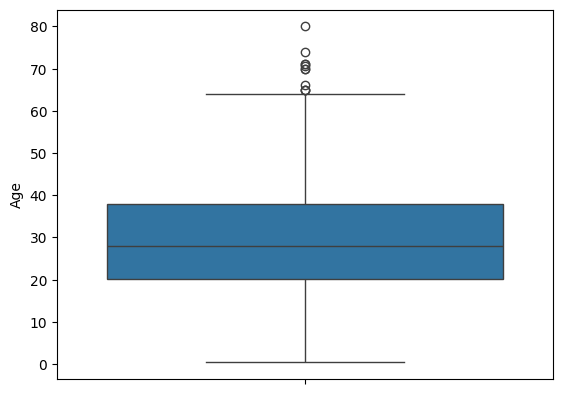

In [178]:
sns.boxplot(df['Age'])